In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import os
from tqdm import tqdm
from astropy.io import fits

In [6]:
root_dir = '/Volumes/jwst/ilongo/processed_data/job_outputs'

In [7]:
curr_dir = '18220_Euclid_SCA_job_001/raw_differences'
curr_path = f'{root_dir}/{curr_dir}'

dirs = os.listdir(curr_path)

file_path = f'{curr_path}/{dirs[0]}'
file_path

'/Volumes/jwst/ilongo/processed_data/job_outputs/18220_Euclid_SCA_job_001/raw_differences/EUCLID_18220_Euclid_SCA_ap30_100k_0p8m0p3_fullnoi_E001_18220_differences.h5'

In [8]:
f = h5py.File(file_path, 'r') # differences, frame times, reference frame

# Go through differences for this one
differences = f['differences']

# Iterate through every frame
pixel_data = []
for frame in tqdm(differences):
    for px in frame:
        for py in px:
            pixel_data.append(py)
            break
        break

pixel_data

100%|██████████| 449/449 [03:54<00:00,  1.92it/s]


[np.float32(-154.0),
 np.float32(-150.0),
 np.float32(-148.0),
 np.float32(-146.0),
 np.float32(-142.0),
 np.float32(-148.0),
 np.float32(-134.0),
 np.float32(-156.0),
 np.float32(-150.0),
 np.float32(-146.0),
 np.float32(-139.0),
 np.float32(-136.0),
 np.float32(-150.0),
 np.float32(-142.0),
 np.float32(-146.0),
 np.float32(-166.0),
 np.float32(-144.0),
 np.float32(-148.0),
 np.float32(-146.0),
 np.float32(-142.0),
 np.float32(-140.0),
 np.float32(-144.0),
 np.float32(-140.0),
 np.float32(-136.0),
 np.float32(-134.0),
 np.float32(-144.0),
 np.float32(-137.0),
 np.float32(-148.0),
 np.float32(-148.0),
 np.float32(-150.0),
 np.float32(-138.0),
 np.float32(-156.0),
 np.float32(-142.0),
 np.float32(-132.0),
 np.float32(-150.0),
 np.float32(-150.0),
 np.float32(-152.0),
 np.float32(-154.0),
 np.float32(-164.0),
 np.float32(-156.0),
 np.float32(-156.0),
 np.float32(-156.0),
 np.float32(-162.0),
 np.float32(-154.0),
 np.float32(-142.0),
 np.float32(-138.0),
 np.float32(-150.0),
 np.float32(-

In [9]:
num_frames = len(differences)
height, width = differences[0].shape

# Load the data into a 3D array: shape (num_frames, height, width)
pixel_array = np.zeros((num_frames, height, width))

for i in tqdm(range(num_frames)):
    pixel_array[i] = differences[i]

100%|██████████| 449/449 [00:16<00:00, 26.63it/s]


[-7.77641058e-01  1.52233162e+01  7.21660995e+00 -2.81518912e+00
 -1.48284159e+01 -1.08391247e+01 -2.82328796e+00  2.31822910e+01
  2.31582794e+01 -2.81860280e+00  1.18536699e+00 -2.82238889e+00
 -2.84071016e+00 -1.88083363e+01  5.20609093e+00  1.92462692e+01
  1.12588043e+01  1.52686253e+01 -4.69661093e+00 -2.66497445e+00
  2.34262085e+00 -2.36563492e+01  2.83368034e+01  2.30499196e+00
  1.02916241e+01 -1.37191973e+01  5.02973557e+01 -5.69768047e+00
 -9.72184563e+00 -3.69830656e+00 -2.16942596e+01  8.29813576e+00
  2.79415965e-01  1.63120918e+01  4.23268471e+01  1.63667660e+01
 -1.16205406e+01  1.03891935e+01 -9.57630348e+00  7.45556259e+00
  1.12684898e+01 -5.73040819e+00  8.26260567e+00 -1.77692204e+01
  2.42177601e+01  6.20682621e+00 -3.77712655e+00  6.22844410e+00
 -3.79587579e+00  8.22759628e+00 -1.77682781e+01 -1.77762203e+01
  1.02056370e+01 -9.76236248e+00 -6.74727917e+00  1.22923822e+01
  1.43052320e+01 -9.68463135e+00  4.35009909e+00 -2.56182938e+01
  1.01364136e+00 -2.89851

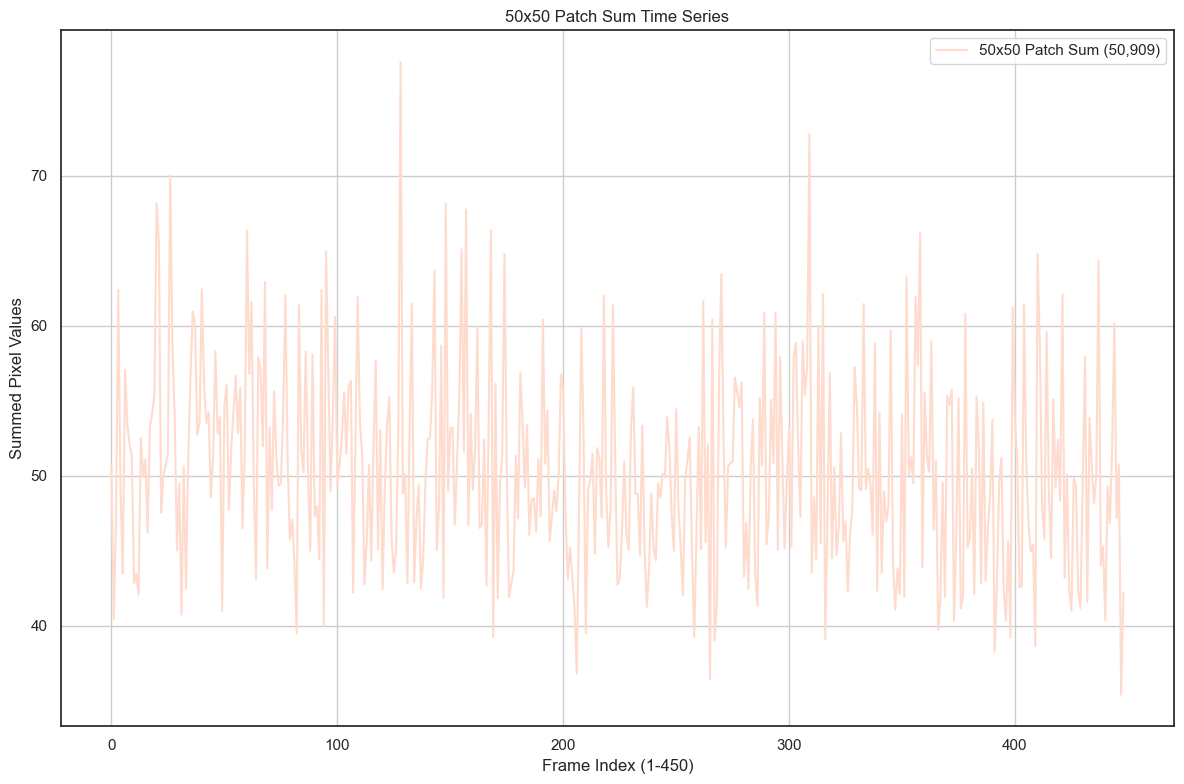

In [49]:
pixels_to_plot = [(50, 909)]
patch_size = 20

plt.figure(figsize=(12, 8))
sns.set_theme(style="white", palette="Reds")

for (x, y) in pixels_to_plot:
    # Calculate patch boundaries around the pixel (x, y)
    half_patch = patch_size // 2
    
    # Ensure patch stays within image bounds
    y_start = max(0, y - half_patch)
    y_end = min(pixel_array.shape[1], y + half_patch)
    x_start = max(0, x - half_patch)
    x_end = min(pixel_array.shape[2], x + half_patch)
    
    # Sum all pixels in the 50x50 patch for each frame
    patch_sum_series = []
    for frame_idx in range(0, 449):  # Frames 1-450
        # Extract the 50x50 patch for this frame
        frame_patch = pixel_array[frame_idx, y_start:y_end, x_start:x_end]
        print(frame_patch.flatten())
        # Sum all pixels in the patch
        patch_sum = np.max(frame_patch.flatten())
        patch_sum_series.append(patch_sum)
    
    # Plot the summed patch time series
    plt.plot(patch_sum_series, label=f'50x50 Patch Sum ({x},{y})')

plt.legend(loc='upper right')
plt.title("50x50 Patch Sum Time Series")
plt.xlabel("Frame Index (1-450)")
plt.ylabel("Summed Pixel Values")
plt.grid(True)
plt.tight_layout()
plt.show()

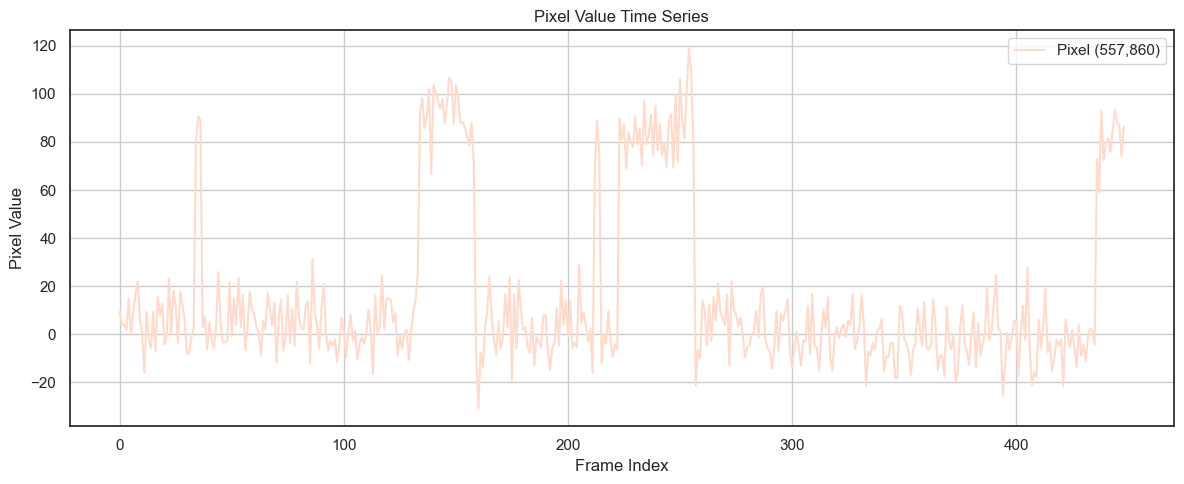

In [ ]:
pixels_to_plot = [(557, 860)]

plt.figure(figsize=(12, 5))
sns.set_theme(style="white", palette="Reds")

for (x, y) in pixels_to_plot:
    pixel_time_series = pixel_array[:, x, y]
    plt.plot(pixel_time_series, label=f'Pixel ({x},{y})')
    plt.legend(loc = 'upper right')

    plt.title(f"Pixel Value Time Series")
    plt.xlabel("Frame Index")
    plt.ylabel("Pixel Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
plt.show()

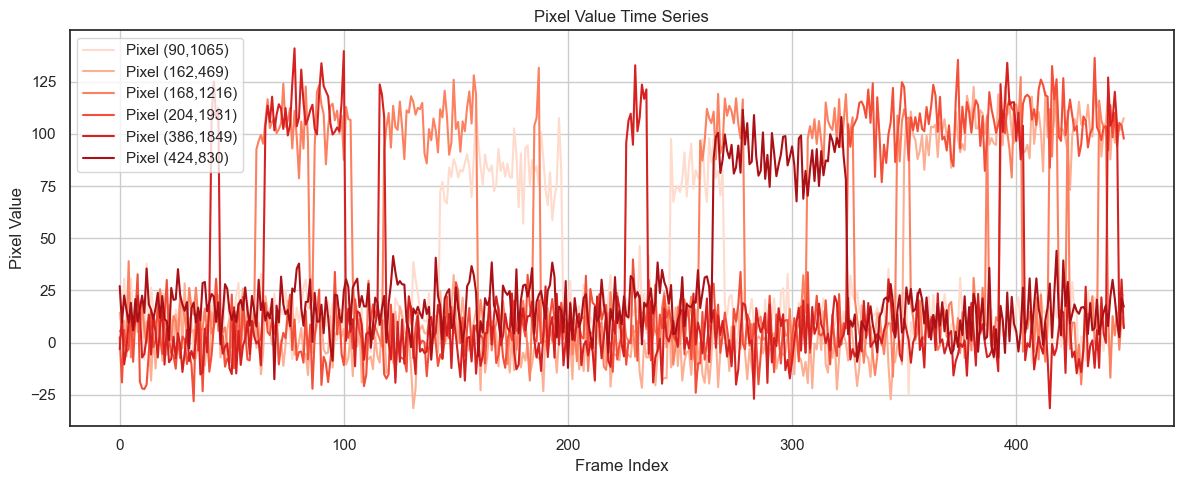

In [ ]:
pixels_to_plot = [(90, 1065), (162, 469), (168, 1216), (204, 1931), (386, 1849), (424, 830)]

plt.figure(figsize=(12, 5))
sns.set_theme(style="white", palette="Reds")

for (x, y) in pixels_to_plot:
    pixel_time_series = pixel_array[:, x, y]
    plt.plot(pixel_time_series, label=f'Pixel ({x},{y})')
    plt.legend(loc = 'upper right')

    plt.title(f"Pixel Value Time Series")
    plt.xlabel("Frame Index")
    plt.ylabel("Pixel Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
plt.show()

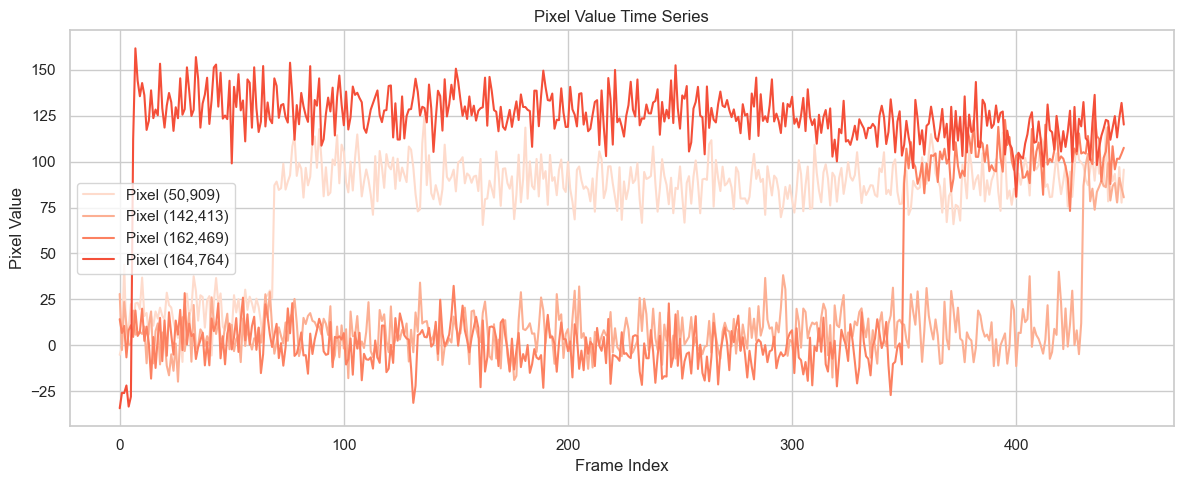

In [62]:
pixels_to_plot = [(50, 909), (142, 413), (162, 469), (164, 764)]

plt.figure(figsize=(12, 5))
sns.set_theme(style="whitegrid", palette="Reds")

for (x, y) in pixels_to_plot:
    pixel_time_series = pixel_array[:, x, y]
    plt.plot(pixel_time_series, label=f'Pixel ({x},{y})')
    plt.title(f"Pixel Value Time Series")
    plt.xlabel("Frame Index")
    plt.ylabel("Pixel Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

plt.show()

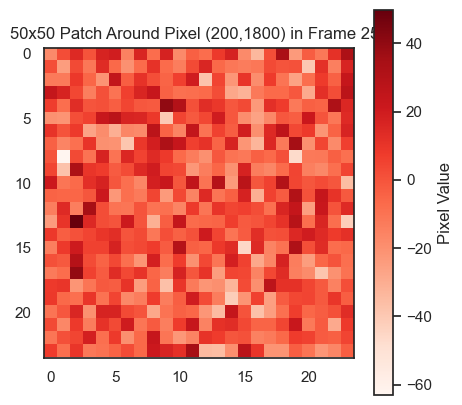

In [24]:
# Target pixel coordinates
center_x, center_y = 200, 1800

# Size of patch (must be even for clean centering)
patch_size = 24
half = patch_size // 2

# Choose a frame to extract from
frame_index = 250  # Or any frame you like (e.g. one with a jump)

# Extract the patch from that frame
frame = pixel_array[frame_index]  # shape: (2048, 2048)

# Ensure we don't go out of bounds
start_x = max(center_x - half, 0)
end_x = min(center_x + half, frame.shape[0])
start_y = max(center_y - half, 0)
end_y = min(center_y + half, frame.shape[1])

patch = frame[start_x:end_x, start_y:end_y]

# Plot it
sns.set_theme(style="white", palette="Reds")
plt.figure(figsize=(5,5))
plt.imshow(patch, cmap='Reds', interpolation='nearest')
# plt.scatter([half], [half], color='red', label='Center Pixel')  # mark center
# plt.legend()
plt.title(f"50x50 Patch Around Pixel ({center_x},{center_y}) in Frame {frame_index}")
plt.colorbar(label='Pixel Value')
plt.show()

In [7]:
# fig = plt.figure(figsize=(10,5))
# plt.plot(pixel_data)
# plt.show()

In [8]:
# # What if read from fits instead without any of the corrections
# test = '/Volumes/jwst/ilongo/raw_data/18220_Euclid_SCA/ap30_100k_0p8m0p3_fullnoi_E001_18220.fits'
# pixel_data_2 = []
# with fits.open(test) as hdul: # goes from 1-450
#     # curr_frame = hdul[1].data.astype(np.float32)

#     for frame_idx in tqdm(range(1, 451)):
#         curr_frame = hdul[frame_idx].data
#         for px in curr_frame:
#             for py in px:
#                 pixel_data_2.append(py)

In [9]:
# pixel_data_2

In [10]:
# plt.plot(pixel_data_2)
# plt.show()